In [2]:
import pandas as pd

In [ ]:
import os

os.getcwd()


'/home/engineersh/code/hayaalsubie/Beyond_the_Stars/notebooks'

In [3]:
review = pd.read_csv("all_reviews.csv")

In [4]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             19345 non-null  object 
 1   City               19345 non-null  object 
 2   Place Type         19345 non-null  object 
 3   Place Category     19345 non-null  object 
 4   Place Name         19345 non-null  object 
 5   Rating             19345 non-null  float64
 6   Review Text        19143 non-null  object 
 7   Reviewer Language  19345 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [5]:
review.columns

Index(['Region', 'City', 'Place Type', 'Place Category', 'Place Name',
       'Rating', 'Review Text', 'Reviewer Language'],
      dtype='object')

In [6]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords if not done already
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/engineersh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# Step 1.1: Drop rows with missing Review Text
review = review.dropna(subset=['Review Text'])

review.shape

(19143, 8)

In [8]:
# Step 1.2: Remove duplicate rows (based on Review Text + Place Name)
review = review.drop_duplicates(subset=['Review Text', 'Place Name'])
review.shape

(17762, 8)

In [9]:
# Step 1.1: Drop rows with missing Review Text
review = review.dropna(subset=['Review Text'])
review.shape

(17762, 8)

In [10]:
# Step 1.2: Remove duplicate rows (based on Review Text + Place Name)
review = review.drop_duplicates(subset=['Review Text', 'Place Name'])
review.shape

(17762, 8)

In [11]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [12]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# make sure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Step 1.3: Define the cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    stop_words = set(stopwords.words('english'))  # define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)  # rejoin cleaned words

# Apply to your DataFrame
review['Cleaned Review'] = review['Review Text'].apply(clean_text)

# Check the result
print(review['Cleaned Review'][0])


[nltk_data] Downloading package punkt to /home/engineersh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


location best good chains outlets available within km distance rooms big amenities served try room service comment checkin checkout smooth cleanliness could improved


In [13]:
# Step 1.4: Apply cleaning
review['Cleaned Review'] = review['Review Text'].apply(clean_text)


In [14]:
#checking one cleaned review
review['Cleaned Review'][0]

'location best good chains outlets available within km distance rooms big amenities served try room service comment checkin checkout smooth cleanliness could improved'

## ✅ Filter to Keep Only English Reviews


In [15]:
# Define allowed English language tags
allowed_langs = ['en', 'en-us']

# Filter to keep only rows with 'en' or 'en-US' (case-insensitive)
review = review[review['Reviewer Language'].str.lower().isin(allowed_langs)]

# Reset index
review = review.reset_index(drop=True)

# Check result
print(f"Remaining rows after keeping only English reviews: {len(review)}")
print("Languages kept:")
print(review['Reviewer Language'].value_counts())


Remaining rows after keeping only English reviews: 17355
Languages kept:
Reviewer Language
en       15585
en-US     1770
Name: count, dtype: int64


## ✅ Step 3: Sentiment Analysis (Labeling Reviews, dummy model)


In [16]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def get_sentiment_scores(text):
    return vader.polarity_scores(text)

# Create new sentiment columns
sentiment_scores = review['Cleaned Review'].apply(get_sentiment_scores).apply(pd.Series)

# Merge back to review DataFrame
review = pd.concat([review, sentiment_scores], axis=1)

# Label sentiment based on compound score
def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

review['Sentiment Label'] = review['compound'].apply(label_sentiment)

# Preview results
print(review[['Cleaned Review', 'compound', 'Sentiment Label']].sample(5))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          Cleaned Review  compound  \
16751  go good area stay nothing special bed damaged ...   -0.5502   
6168   fine asian restaurant jeddah offers diverse ar...    0.7964   
5377           great idea diversity local products loved    0.8402   
16220  absolutely loved mall conveniently located lot...    0.8516   
13635  ordered lentil soup fatouch kebab rice food ta...    0.9735   

      Sentiment Label  
16751        negative  
6168         positive  
5377         positive  
16220        positive  
13635        positive  


<Axes: >

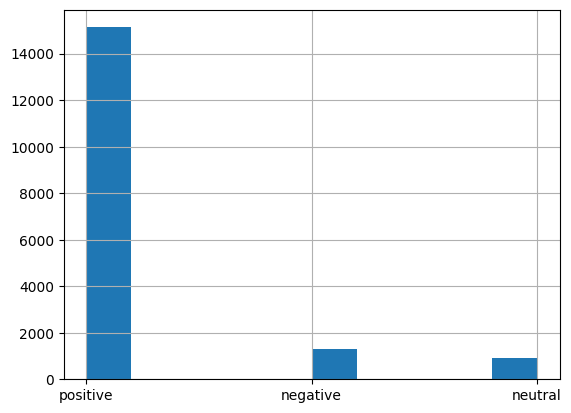

In [17]:
review["Sentiment Label"].hist()

In [18]:
review.head()

Region  City Place Type Place Category              Place Name  Rating  \
0  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
1  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
2  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
3  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
4  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   

                                         Review Text Reviewer Language  \
0  Location is best, all good chains outlets avai...                en   
1  Rooms are good enough to accommodate a family ...                en   
2  Just a reasonable cheap hotel, the price is th...                en   
3  We had a bad experience in reception. They did...                en   
4  One of the best and budget friendly hotels in ...                en   

                                      Cleaned Review    neg    neu    pos  \
0  location best good chains outlets available wi...  0.000  0.662  0.338   
1  rooms good enough accommodate family kids neat...  0.000  0.395  0.605   
2   reasonable cheap hotel price main success factor  0.000  0.619  0.381   
3  bad experience reception give rooms per bookin...  0.234  0.766  0.000   
4  one best budget friendly hotels hail good swim...  0.000  0.214  0.786   

   compound Sentiment Label  
0    0.8807        positive  
1    0.8658        positive  
2    0.5719        positive  
3   -0.7506        negative  
4    0.9545        positive

In [19]:
review['Cleaned Review'].head()

0    location best good chains outlets available wi...
1    rooms good enough accommodate family kids neat...
2     reasonable cheap hotel price main success factor
3    bad experience reception give rooms per bookin...
4    one best budget friendly hotels hail good swim...
Name: Cleaned Review, dtype: object

In [20]:
review['Cleaned Review']

0        location best good chains outlets available wi...
1        rooms good enough accommodate family kids neat...
2         reasonable cheap hotel price main success factor
3        bad experience reception give rooms per bookin...
4        one best budget friendly hotels hail good swim...
                               ...                        
17350    mashallah place beautiful employees respectful...
17351       crasy price kids games high mantioned price sr
17352                  great place much fun friends family
17353    good collections games leasure kids cleaniness...
17354    maintainanceit closed another one near radison...
Name: Cleaned Review, Length: 17355, dtype: object

In [21]:
review['Place Type']

0                 hotel
1                 hotel
2                 hotel
3                 hotel
4                 hotel
              ...      
17350    amusement_park
17351    amusement_park
17352    amusement_park
17353    amusement_park
17354    amusement_park
Name: Place Type, Length: 17355, dtype: object

In [22]:
# #import pandas as pd

# #data = {
#     'Place Type': ['hotel', 'hotel', 'restaurant', 'restaurant', 'cafe', 'cafe', 'museum', 'museum', 'park', 'park',
#                    'hotel', 'restaurant', 'cafe', 'museum', 'park'],
#     'Cleaned Review': [
#         'Great location and nice rooms.',
#         'Friendly staff and clean facilities.',
#         'Delicious food but slow service.',
#         'Wonderful ambiance and great desserts.',
#         'Cozy place with good coffee.',
#         'Nice environment and good pastries.',
#         'Interesting exhibits and friendly staff.',
#         'Amazing history and well-preserved artifacts.',
#         'Lovely park with clean areas for kids.',
#         'Peaceful place with lots of greenery.',
#         'Comfortable bed and good breakfast.',
#         'Fast service and excellent quality.',
#         'Nice quiet cafe with great ambiance.',
#         'Interesting museum with interactive exhibits.',
#         'Beautiful park with scenic walking paths.'
#     ]
# }

# #df = pd.DataFrame(data)

# #print(df)


In [23]:
review.head()

Region  City Place Type Place Category              Place Name  Rating  \
0  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
1  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
2  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
3  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
4  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   

                                         Review Text Reviewer Language  \
0  Location is best, all good chains outlets avai...                en   
1  Rooms are good enough to accommodate a family ...                en   
2  Just a reasonable cheap hotel, the price is th...                en   
3  We had a bad experience in reception. They did...                en   
4  One of the best and budget friendly hotels in ...                en   

                                      Cleaned Review    neg    neu    pos  \
0  location best good chains outlets available wi...  0.000  0.662  0.338   
1  rooms good enough accommodate family kids neat...  0.000  0.395  0.605   
2   reasonable cheap hotel price main success factor  0.000  0.619  0.381   
3  bad experience reception give rooms per bookin...  0.234  0.766  0.000   
4  one best budget friendly hotels hail good swim...  0.000  0.214  0.786   

   compound Sentiment Label  
0    0.8807        positive  
1    0.8658        positive  
2    0.5719        positive  
3   -0.7506        negative  
4    0.9545        positive

In [24]:
df = review.copy()
df_pos = df[df['Rating'] >= 3.5]
df_neg = df[df['Rating'] < 3.5]


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

place_types = df['Place Type'].unique()

for place in place_types:
    print(f"\n--- Topics for {place} ---")

    place_df = df[df['Place Type'] == place]

    texts = place_df['Cleaned Review'].dropna().values.astype('U')

    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])



--- Topics for hotel ---

Topic #1:
['stay', 'place', 'location', 'service', 'rooms', 'staff', 'nice', 'clean', 'hotel', 'good']

Topic #2:
['beautiful', 'cleanliness', 'excellent', 'place', 'reception', 'bathroom', 'hotel', 'room', 'clean', 'god']

Topic #3:
['time', 'reception', 'rooms', 'experience', 'staff', 'stay', 'bad', 'service', 'room', 'hotel']

Topic #4:
['amazing', 'comfortable', 'highly', 'recommend', 'great', 'staff', 'experience', 'service', 'stay', 'hotel']

Topic #5:
['parking', 'breakfast', 'nice', 'location', 'place', 'rooms', 'clean', 'hotel', 'good', 'room']

--- Topics for restaurant ---

Topic #1:
['recommend', 'dining', 'highly', 'staff', 'delicious', 'great', 'restaurant', 'service', 'food', 'experience']

Topic #2:
['cleanliness', 'place', 'dishes', 'fish', 'excellent', 'quality', 'service', 'experience', 'restaurant', 'food']

Topic #3:
['ordered', 'restaurant', 'delicious', 'shawarma', 'food', 'good', 'rice', 'best', 'taste', 'chicken']

Topic #4:
['taste',

In [26]:
df.head()

Region  City Place Type Place Category              Place Name  Rating  \
0  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
1  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
2  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
3  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
4  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   

                                         Review Text Reviewer Language  \
0  Location is best, all good chains outlets avai...                en   
1  Rooms are good enough to accommodate a family ...                en   
2  Just a reasonable cheap hotel, the price is th...                en   
3  We had a bad experience in reception. They did...                en   
4  One of the best and budget friendly hotels in ...                en   

                                      Cleaned Review    neg    neu    pos  \
0  location best good chains outlets available wi...  0.000  0.662  0.338   
1  rooms good enough accommodate family kids neat...  0.000  0.395  0.605   
2   reasonable cheap hotel price main success factor  0.000  0.619  0.381   
3  bad experience reception give rooms per bookin...  0.234  0.766  0.000   
4  one best budget friendly hotels hail good swim...  0.000  0.214  0.786   

   compound Sentiment Label  
0    0.8807        positive  
1    0.8658        positive  
2    0.5719        positive  
3   -0.7506        negative  
4    0.9545        positive

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

place_types = df['Place Type'].unique()

for place in place_types:
    print(f"\n--- Topics for {place} ---")

    place_df = df[df['Place Type'] == place]

    texts = place_df['Cleaned Review'].dropna().values.astype('U')

    vectorizer = CountVectorizer(max_df=0.85, min_df=1, stop_words='english')
    dtm = vectorizer.fit_transform(texts)

    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)

    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(lda.components_):
        print(f"\nTopic #{idx + 1}:")
        print([words[i] for i in topic.argsort()[-10:]])



--- Topics for hotel ---

Topic #1:
['like', 'bathroom', 'clean', 'service', 'bad', 'good', 'water', 'rooms', 'hotel', 'room']

Topic #2:
['location', 'rooms', 'great', 'nice', 'service', 'stay', 'staff', 'clean', 'good', 'hotel']

Topic #3:
['booking', 'check', 'reception', 'experience', 'time', 'service', 'stay', 'staff', 'room', 'hotel']

Topic #4:
['comfortable', 'making', 'recommend', 'exceptional', 'highly', 'truly', 'service', 'hotel', 'experience', 'stay']

Topic #5:
['cleanliness', 'treatment', 'hotel', 'reception', 'thank', 'place', 'excellent', 'god', 'beautiful', 'clean']

--- Topics for restaurant ---

Topic #1:
['delicious', 'staff', 'time', 'order', 'place', 'restaurant', 'service', 'nice', 'food', 'good']

Topic #2:
['flies', 'money', 'time', 'worst', 'table', 'menu', 'order', 'food', 'service', 'bad']

Topic #3:
['delicious', 'staff', 'best', 'great', 'chicken', 'service', 'place', 'restaurant', 'good', 'food']

Topic #4:
['highly', 'atmosphere', 'staff', 'great', 'de

In [28]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk

nltk.download('vader_lexicon')

vader = SentimentIntensityAnalyzer()

def get_sentiment_scores(text):
    return vader.polarity_scores(text)

df['Sentiment Scores'] = df['Cleaned Review'].apply(get_sentiment_scores)
sentiment_scores = pd.json_normalize(df['Sentiment Scores'])

for col in sentiment_scores.columns:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

df = pd.concat([df, sentiment_scores], axis=1)

def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment Label'] = df['compound'].apply(lambda x: label_sentiment(x) if isinstance(x, (int, float)) else 'neutral')

hotel_topic_labels = {
    0: "Room Comfort & Service",
    1: "Location & Cleanliness",
    2: "Reception & Booking",
    3: "Exceptional Experience",
    4: "Hotel Reception & Cleanliness"
}

restaurant_topic_labels = {
    0: "Delicious Food & Service",
    1: "Poor Service & Price",
    2: "Good Ambiance & Food",
    3: "Slow Service & Unpleasant Experience",
    4: "Great Restaurant Vibe"
}

cafe_topic_labels = {
    0: "Chill Atmosphere & Coffee",
    1: "Crowded & Slow Service",
    2: "Cozy & Relaxing",
    3: "Busy & Noisy",
    4: "Affordable & Tasty"
}

park_topic_labels = {
    0: "Peaceful Family Time",
    1: "Crowded & Dirty",
    2: "Relaxing Greenery",
    3: "Maintenance Issues",
    4: "Good for Kids"
}

museum_topic_labels = {
    0: "Educational Experience",
    1: "Disappointing Visit",
    2: "Interesting Exhibits",
    3: "Small & Overpriced",
    4: "Historical Value"
}

def map_topic_labels(row):
    if row['Place Type'] == 'hotel':
        return hotel_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'restaurant':
        return restaurant_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'cafe':
        return cafe_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'amusement_park':
        return park_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    elif row['Place Type'] == 'museum':
        return museum_topic_labels.get(row['Topic'], f"Topic {row['Topic']}")
    else:
        return f"Topic {row['Topic']}"

place_types = df['Place Type'].unique()
lda_results = []

for place in place_types:
    place_df = df[df['Place Type'] == place]
    texts = place_df['Cleaned Review'].dropna().values.astype('U')
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(texts)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(dtm)
    place_df = place_df.copy()
    place_df['Topic'] = [i % 5 for i in range(len(place_df))]
    place_df['Topic Label'] = place_df.apply(map_topic_labels, axis=1)
    lda_results.append(place_df[['Place Type', 'Cleaned Review', 'Topic', 'Topic Label', 'Sentiment Label']])

lda_combined_df = pd.concat(lda_results)
print(lda_combined_df.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/engineersh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


  Place Type                                     Cleaned Review  Topic  \
0      hotel  location best good chains outlets available wi...      0   
1      hotel  rooms good enough accommodate family kids neat...      1   
2      hotel   reasonable cheap hotel price main success factor      2   
3      hotel  bad experience reception give rooms per bookin...      3   
4      hotel  one best budget friendly hotels hail good swim...      4   

                     Topic Label Sentiment Label  
0         Room Comfort & Service        positive  
1         Location & Cleanliness        positive  
2            Reception & Booking        positive  
3         Exceptional Experience        negative  
4  Hotel Reception & Cleanliness        positive  


The distribution of sentiment by location type

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=lda_combined_df, x='Place Type', hue='Sentiment Label', palette='Set2')
plt.title('Distribution of Sentiment Labels by Place Type')
plt.xlabel('Place Type')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Most popular topics in each type of place

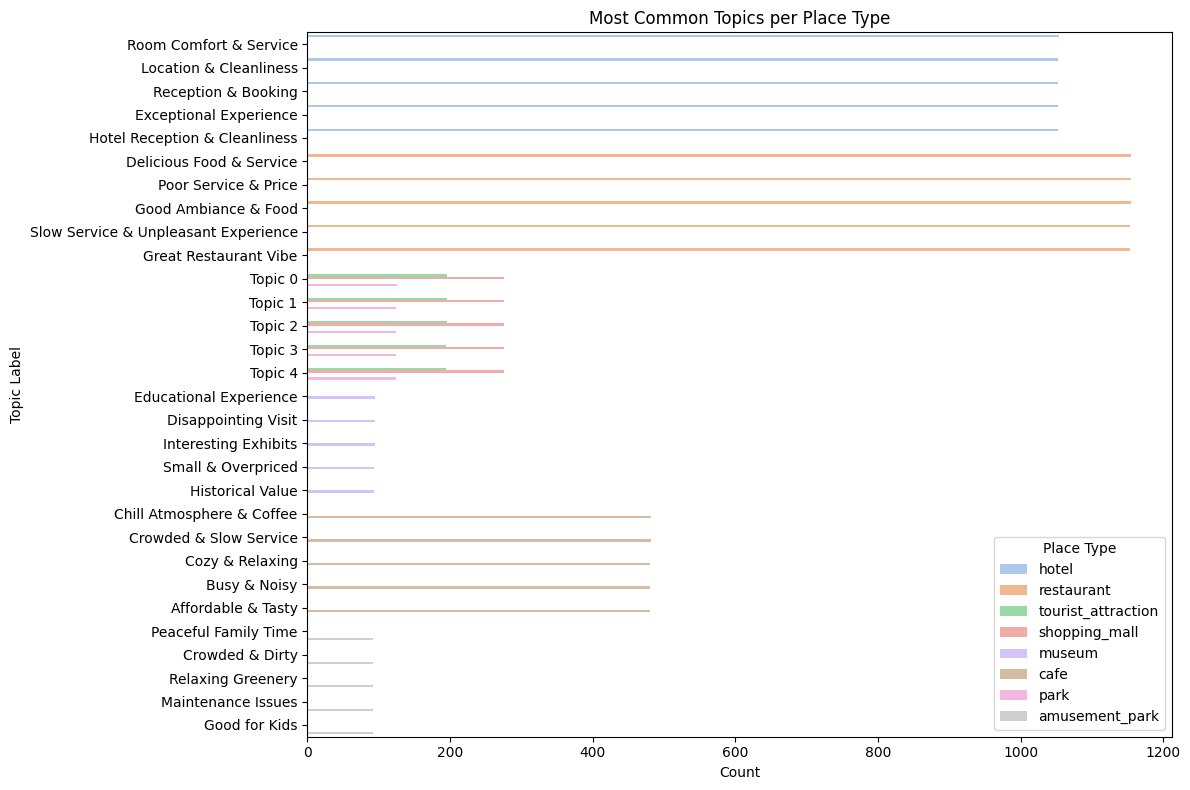

In [30]:
plt.figure(figsize=(12, 8))
sns.countplot(data=lda_combined_df, y='Topic Label', hue='Place Type', palette='pastel')
plt.title('Most Common Topics per Place Type')
plt.xlabel('Count')
plt.ylabel('Topic Label')
plt.legend(title='Place Type')
plt.tight_layout()
plt.show()

Sentiment analysis for each topic

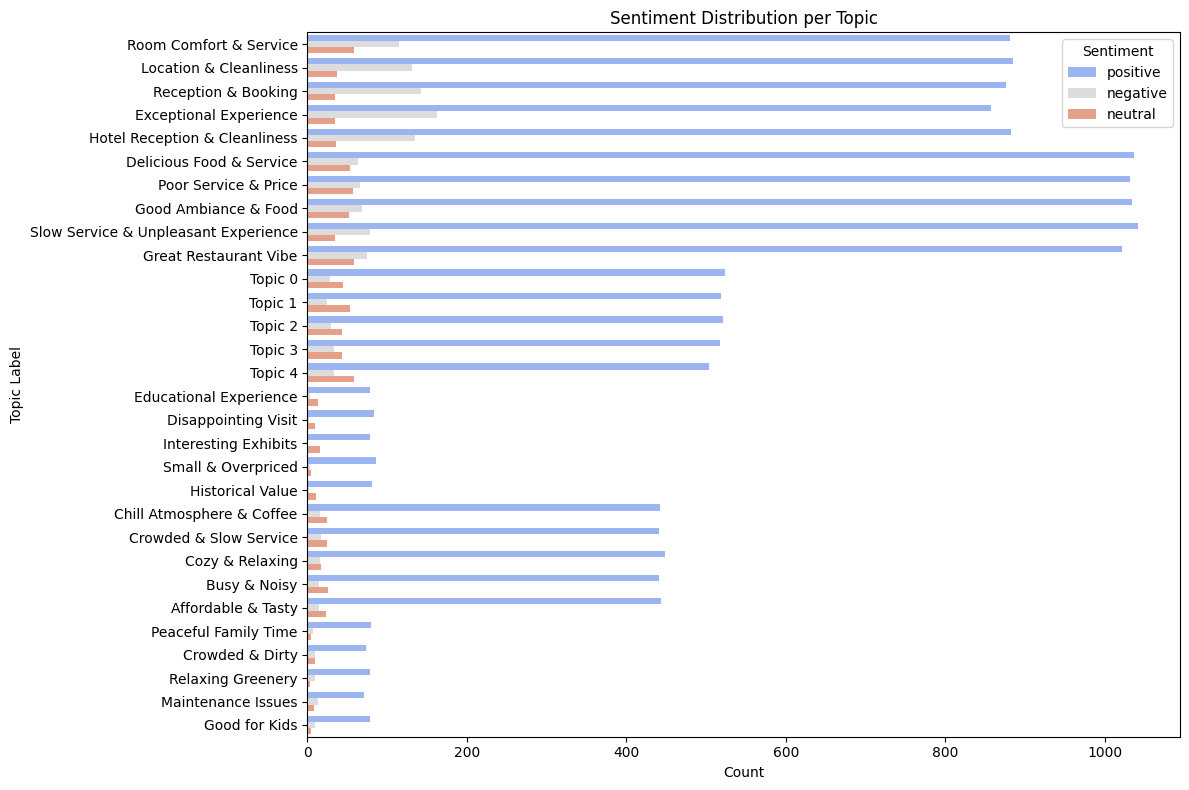

In [31]:
plt.figure(figsize=(12, 8))
sns.countplot(data=lda_combined_df, y='Topic Label', hue='Sentiment Label', palette='coolwarm')
plt.title('Sentiment Distribution per Topic')
plt.xlabel('Count')
plt.ylabel('Topic Label')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [32]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


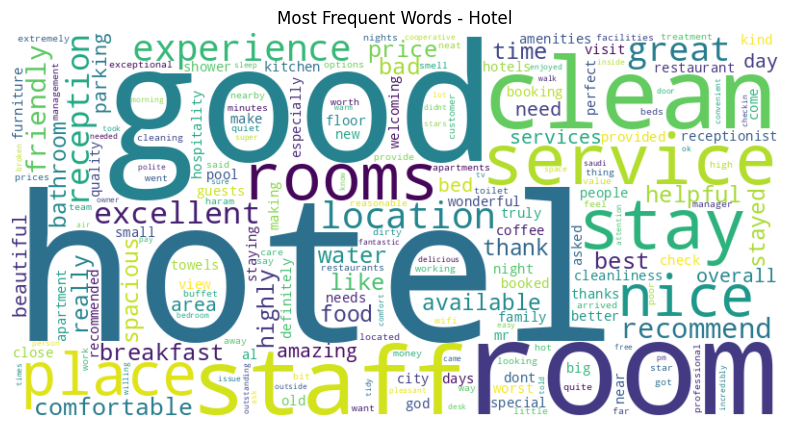

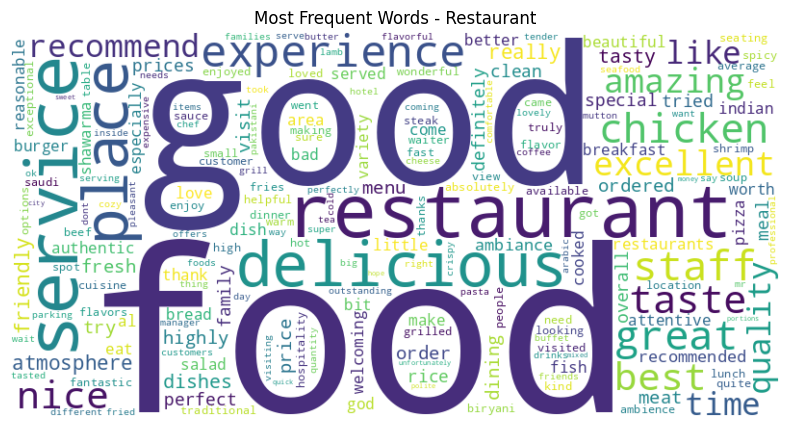

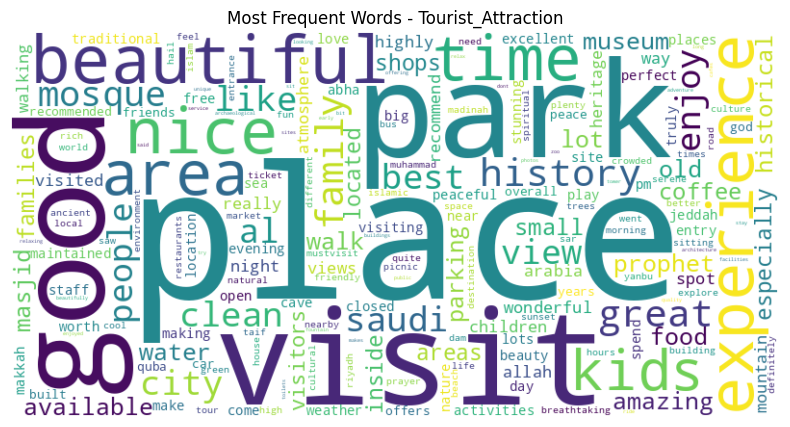

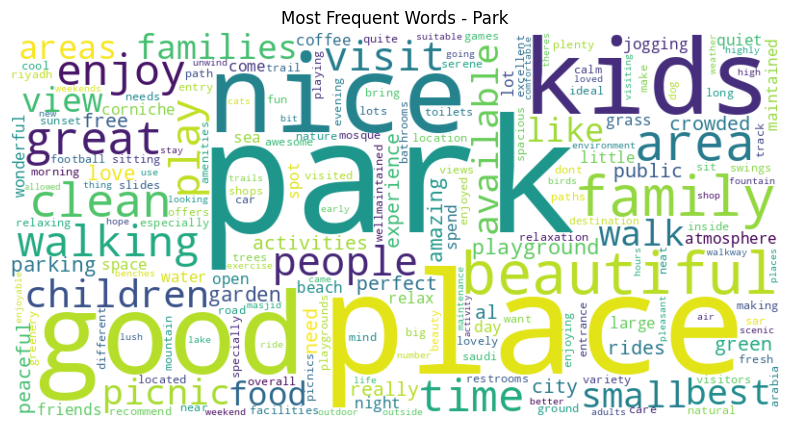

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import matplotlib.pyplot as plt

for place in lda_combined_df['Place Type'].unique():
    text = " ".join(lda_combined_df[lda_combined_df['Place Type'] == place]['Cleaned Review'])
    vectorizer = CountVectorizer(stop_words='english')
    word_freq = vectorizer.fit_transform([text])
    words = vectorizer.get_feature_names_out()
    freqs = word_freq.toarray().flatten()
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(words, freqs)))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most Frequent Words - {place.title()}')
    plt.show()


Sentiment ratio (percentage) for each place type

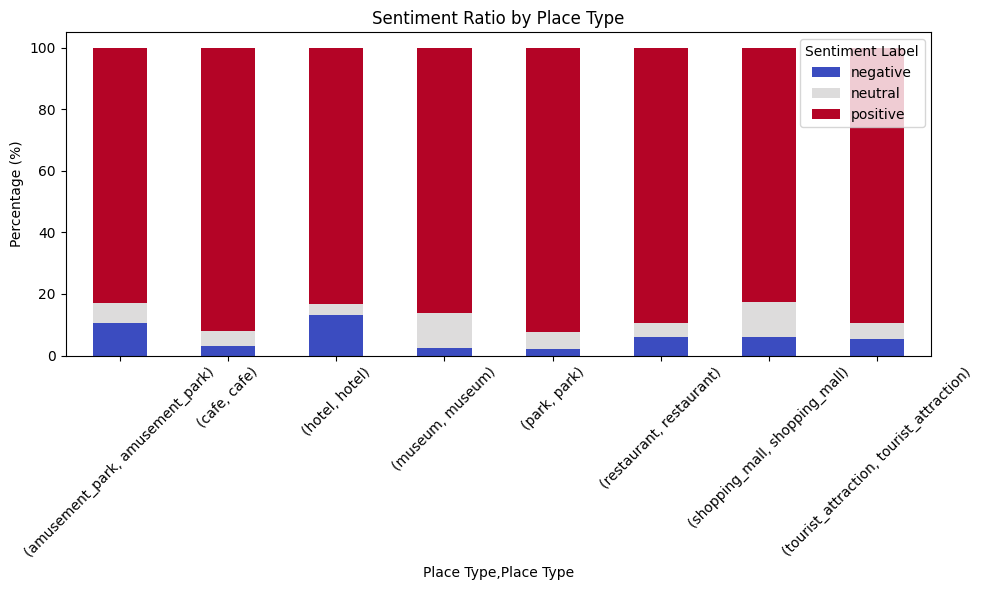

In [34]:
sentiment_ratio = lda_combined_df.groupby(['Place Type', 'Sentiment Label']).size().groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()
sentiment_ratio.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title('Sentiment Ratio by Place Type')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Topic analysis by emotion type

In [35]:
lda_combined_df['Review Length'] = lda_combined_df['Cleaned Review'].apply(lambda x: len(x.split()))
sns.boxplot(data=lda_combined_df, x='Sentiment Label', y='Review Length', palette='coolwarm')
plt.title('Review Length by Sentiment')
plt.show()


/tmp/ipykernel_43003/1415530499.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=lda_combined_df, x='Sentiment Label', y='Review Length', palette='coolwarm')


# Positive_Reviews_Analysis

In [36]:
df = review.copy()
df_pos = df[df['Rating'] >= 3.5]

df_pos['Cleaned Review'] = df_pos['Review Text']

/tmp/ipykernel_43003/1439758938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Cleaned Review'] = df_pos['Review Text']


In [37]:
df_pos.head()

Region  City Place Type Place Category              Place Name  Rating  \
0  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
1  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
2  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
3  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   
4  North  Hail      hotel        lodging  Tamyoz Hotel Apartment     3.7   

                                         Review Text Reviewer Language  \
0  Location is best, all good chains outlets avai...                en   
1  Rooms are good enough to accommodate a family ...                en   
2  Just a reasonable cheap hotel, the price is th...                en   
3  We had a bad experience in reception. They did...                en   
4  One of the best and budget friendly hotels in ...                en   

                                      Cleaned Review    neg    neu    pos  \
0  Location is best, all good chains outlets avai...  0.000  0.662  0.338   
1  Rooms are good enough to accommodate a family ...  0.000  0.395  0.605   
2  Just a reasonable cheap hotel, the price is th...  0.000  0.619  0.381   
3  We had a bad experience in reception. They did...  0.234  0.766  0.000   
4  One of the best and budget friendly hotels in ...  0.000  0.214  0.786   

   compound Sentiment Label  
0    0.8807        positive  
1    0.8658        positive  
2    0.5719        positive  
3   -0.7506        negative  
4    0.9545        positive

Distribution of evaluations:

In [38]:
plt.figure(figsize=(8,6))
sns.histplot(df_pos['Rating'], bins=10, kde=True, color='green')
plt.title('Distribution of Positive Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True)
plt.show()


WordCloud:

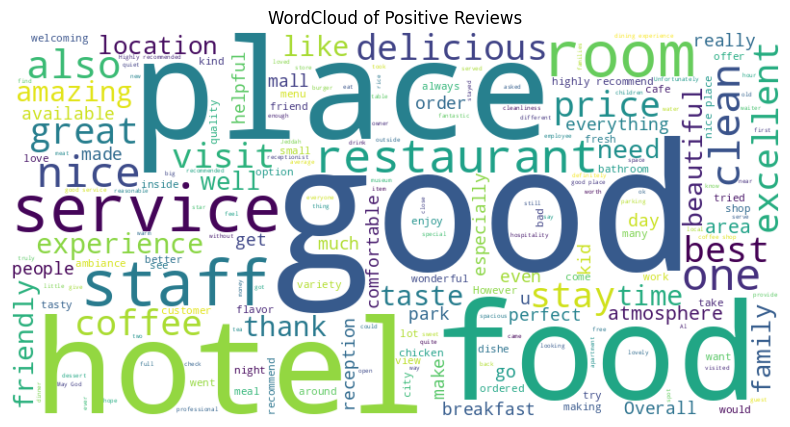

In [39]:
text = " ".join(df_pos['Cleaned Review'])

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Positive Reviews')
plt.show()


LDA analysis:

In [40]:
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
dtm = vectorizer.fit_transform(df_pos['Cleaned Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

words = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"\nTopic #{idx+1}:")
    print([words[i] for i in topic.argsort()[-10:]])



Topic #1:
['restaurant', 'truly', 'visit', 'thank', 'dining', 'special', 'god', 'coffee', 'service', 'experience']

Topic #2:
['parking', 'beautiful', 'visit', 'good', 'area', 'kids', 'al', 'mall', 'park', 'place']

Topic #3:
['reception', 'stay', 'staff', 'bad', 'rooms', 'clean', 'service', 'good', 'room', 'hotel']

Topic #4:
['place', '10', 'best', 'chicken', 'service', 'taste', 'delicious', 'restaurant', 'good', 'food']

Topic #5:
['hotel', 'service', 'friendly', 'coffee', 'clean', 'great', 'staff', 'nice', 'good', 'place']


Topic Bar Chart:

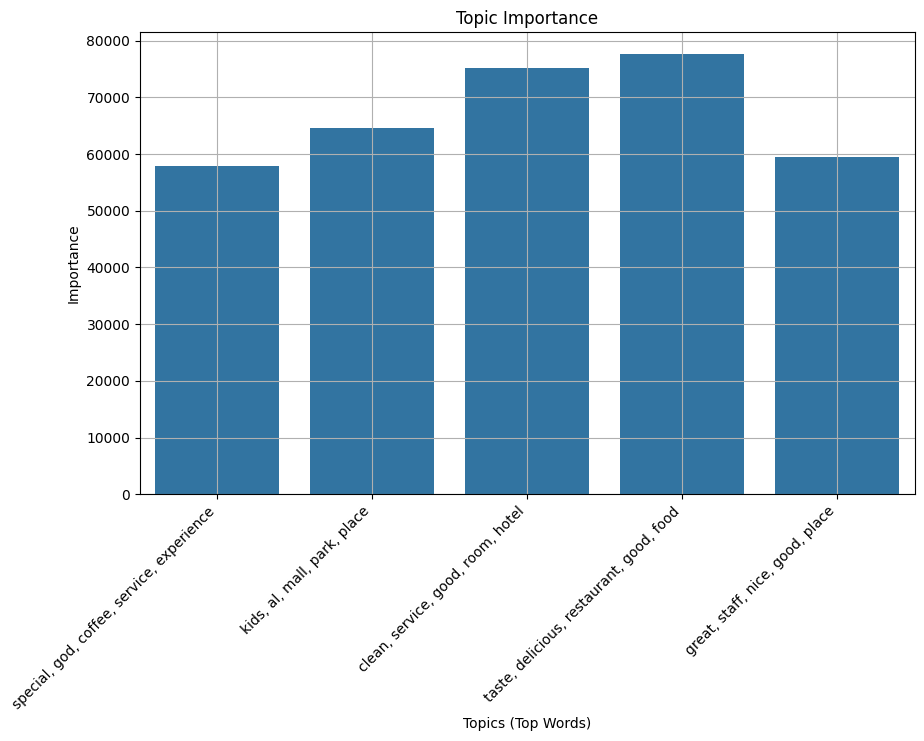

In [41]:
topic_word_counts = []

for topic in lda.components_:
    top_words = [words[i] for i in topic.argsort()[-5:]]
    topic_word_counts.append(", ".join(top_words))

plt.figure(figsize=(10,6))
sns.barplot(x=list(range(1,6)), y=lda.components_.sum(axis=1))
plt.xticks(ticks=range(5), labels=topic_word_counts, rotation=45, ha='right')
plt.title('Topic Importance')
plt.xlabel('Topics (Top Words)')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


Most frequently repeated words in bar blot:

In [42]:
word_counts = vectorizer.transform(df_pos['Cleaned Review']).sum(axis=0)
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:15]

words, counts = zip(*words_freq)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 15 Most Frequent Words in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.grid(True)
plt.show()


/tmp/ipykernel_43003/1276418166.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


Comment length:

In [43]:
df_pos['Review Length'] = df_pos['Cleaned Review'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,6))
sns.histplot(df_pos['Review Length'], bins=20, color='blue')
plt.title('Distribution of Review Lengths (Positive Reviews)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()


/tmp/ipykernel_43003/763816413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Review Length'] = df_pos['Cleaned Review'].apply(lambda x: len(x.split()))


Scatter Plot between length and evaluation:

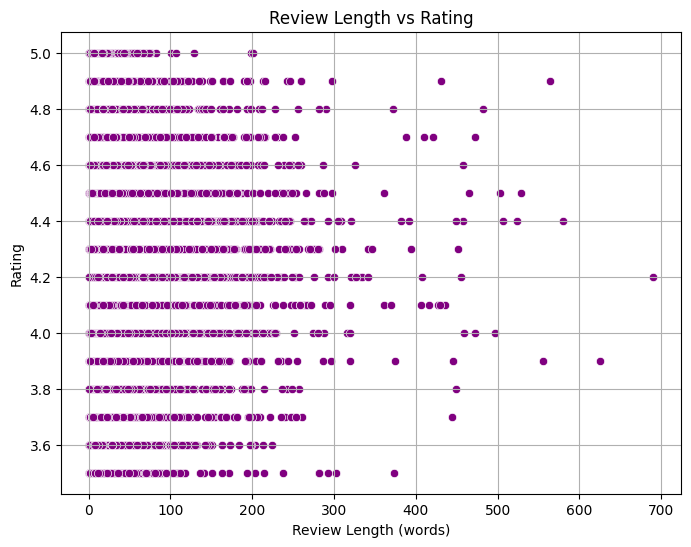

In [44]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Review Length', y='Rating', data=df_pos, color='purple')
plt.title('Review Length vs Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


Pie Chart for Positive Mini-Words:

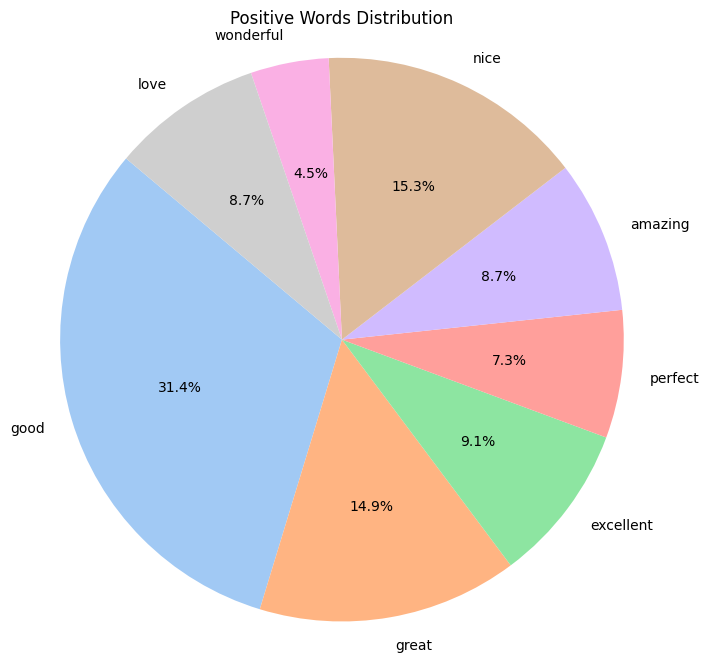

In [45]:
positive_words = ['good', 'great', 'excellent', 'perfect', 'amazing', 'nice', 'wonderful', 'love']

word_counter = {word: 0 for word in positive_words}

for review in df_pos['Cleaned Review']:
    for word in positive_words:
        if word in review:
            word_counter[word] += 1

labels = list(word_counter.keys())
sizes = list(word_counter.values())

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Positive Words Distribution')
plt.axis('equal')
plt.show()


# Negative _Reviews_Analysis

In [46]:
df_neg = df[df['Rating'] < 3.5]

df_neg['Cleaned Review'] = df_neg['Review Text'].astype(str).str.lower()

/tmp/ipykernel_43003/511166920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['Cleaned Review'] = df_neg['Review Text'].astype(str).str.lower()


In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_neg['Cleaned Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

words = vectorizer.get_feature_names_out()
topics = []

for idx, topic in enumerate(lda.components_):
    topics.append([words[i] for i in topic.argsort()[-10:]])

for idx, topic in enumerate(topics):
    print(f"Topic #{idx + 1}: {topic}")

blind_spots = df_neg[df_neg['Cleaned Review'].str.contains('Lack of Service|Not Available|Amenities Not Present', na=False)]

blind_spots[['Place Name', 'Cleaned Review']]

Topic #1: ['staff', 'hotel', 'service', 'place', 'rooms', 'food', 'room', 'nice', 'clean', 'good']
Topic #2: ['disappointing', 'time', 'staff', 'place', 'experience', 'night', 'service', 'room', 'hotel', 'stay']
Topic #3: ['water', 'service', 'staff', 'don', 'reception', 'rooms', 'dirty', 'bad', 'room', 'hotel']
Topic #4: ['kids', 'available', 'just', 'don', 'like', 'staff', 'service', 'place', 'bad', 'good']
Topic #5: ['average', 'food', 'good', 'service', 'god', 'price', 'coffee', 'park', 'excellent', 'place']


Empty DataFrame
Columns: [Place Name, Cleaned Review]
Index: []

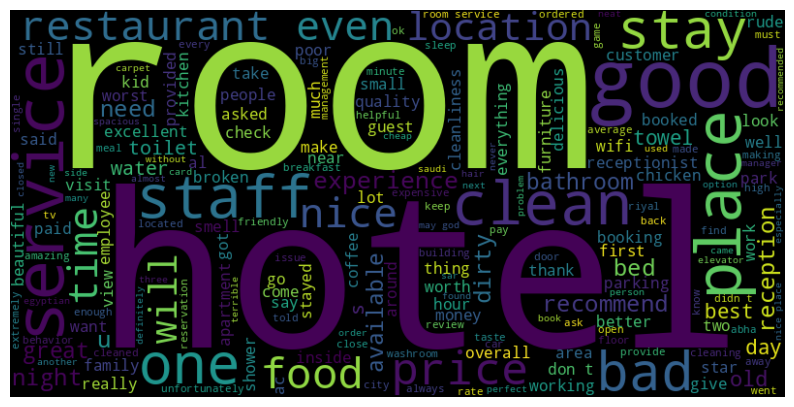

In [48]:
negative_text = ' '.join(df_neg['Cleaned Review'])

wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Bar Plot for Sentiment Distribution

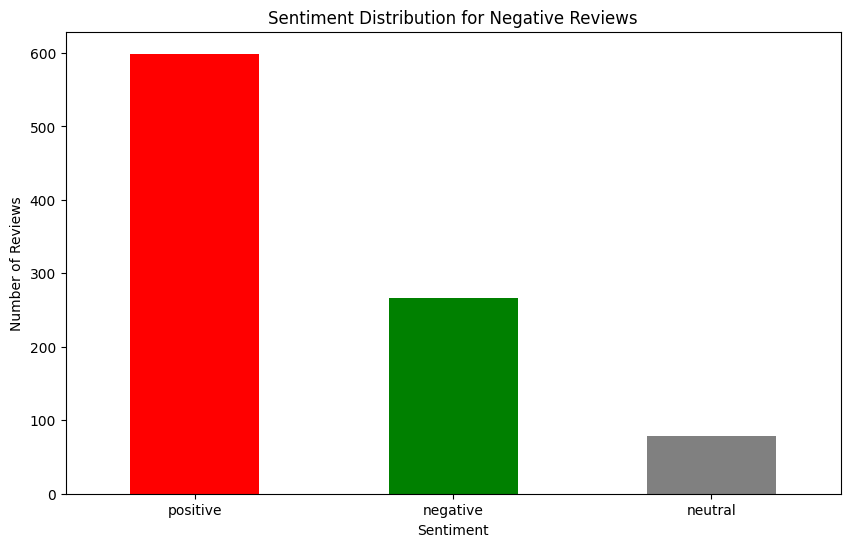

In [49]:
sentiment_counts = df_neg['Sentiment Label'].value_counts()

plt.figure(figsize=(10,6))
sentiment_counts.plot(kind='bar', color=['red', 'green', 'grey'])
plt.title('Sentiment Distribution for Negative Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


Word Cloud for Negative Reviews

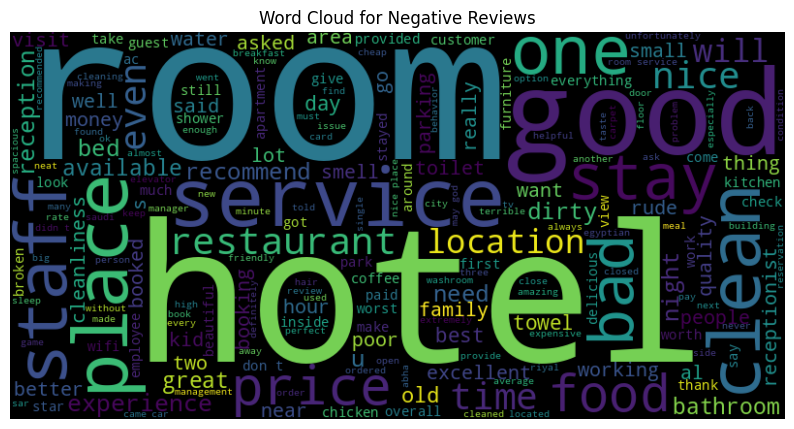

In [50]:
from wordcloud import WordCloud

negative_text = ' '.join(df_neg['Cleaned Review'])
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()


Pie Chart for Sentiment Proportion

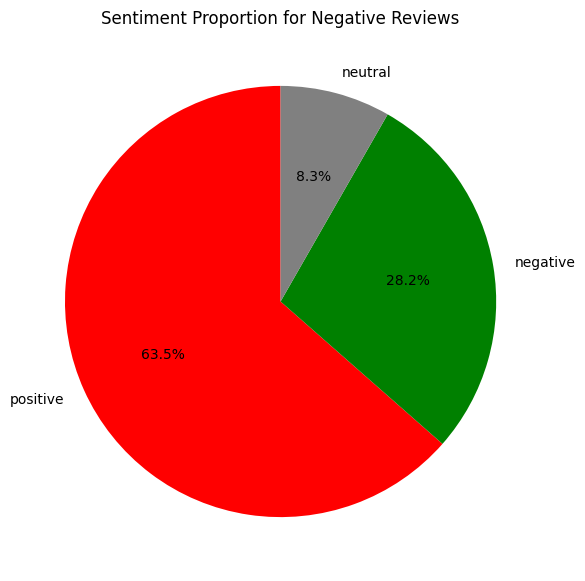

In [51]:
sentiment_proportion = df_neg['Sentiment Label'].value_counts()

plt.figure(figsize=(7,7))
sentiment_proportion.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'grey'])
plt.title('Sentiment Proportion for Negative Reviews')
plt.ylabel('')
plt.show()


Bar Plot for Sentiment by Place Type

In [52]:
sentiment_by_place_type = df_neg.groupby(['Place Type', 'Sentiment Label']).size().unstack()

sentiment_by_place_type.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Sentiment by Place Type in Negative Reviews')
plt.xlabel('Place Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


Top 10 Frequent Words in Negative Reviews

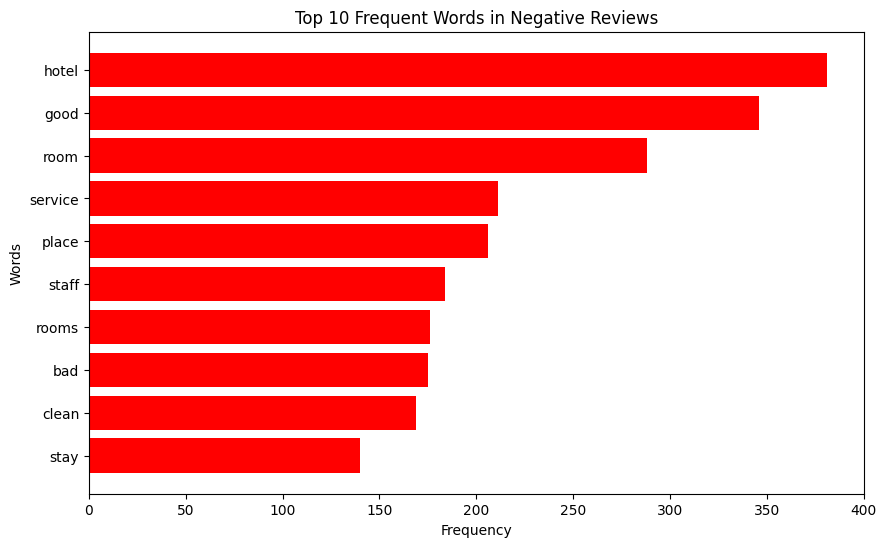

In [53]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df_neg['Cleaned Review'])
word_count = dtm.sum(axis=0).A1
words = vectorizer.get_feature_names_out()

word_freq = dict(zip(words, word_count))
sorted_word_freq = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
top_words, top_counts = zip(*sorted_word_freq)

plt.figure(figsize=(10,6))
plt.barh(top_words, top_counts, color='red')
plt.title('Top 10 Frequent Words in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()
plt.show()


Topic Distribution for Negative Reviews (LDA)

/tmp/ipykernel_43003/754138314.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_neg['Topic'] = topic_distribution.argmax(axis=1)


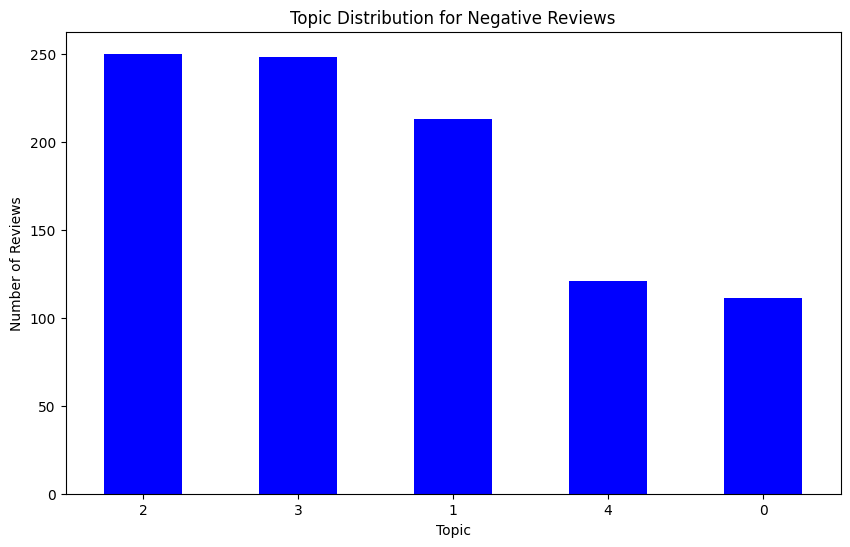

In [54]:
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(stop_words='english')
dtm = vectorizer.fit_transform(df_neg['Cleaned Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

topic_distribution = lda.transform(dtm)
df_neg['Topic'] = topic_distribution.argmax(axis=1)

topic_counts = df_neg['Topic'].value_counts()

plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar', color='blue')
plt.title('Topic Distribution for Negative Reviews')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


Sentiment vs Rating for Negative Reviews

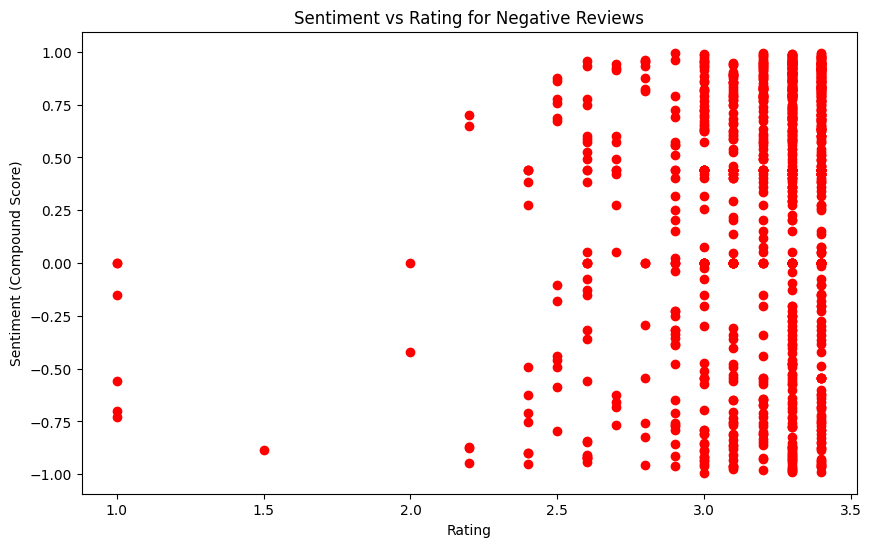

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(df_neg['Rating'], df_neg['compound'], color='red')
plt.title('Sentiment vs Rating for Negative Reviews')
plt.xlabel('Rating')
plt.ylabel('Sentiment (Compound Score)')
plt.show()


Correlation Heatmap for Sentiment and Ratings

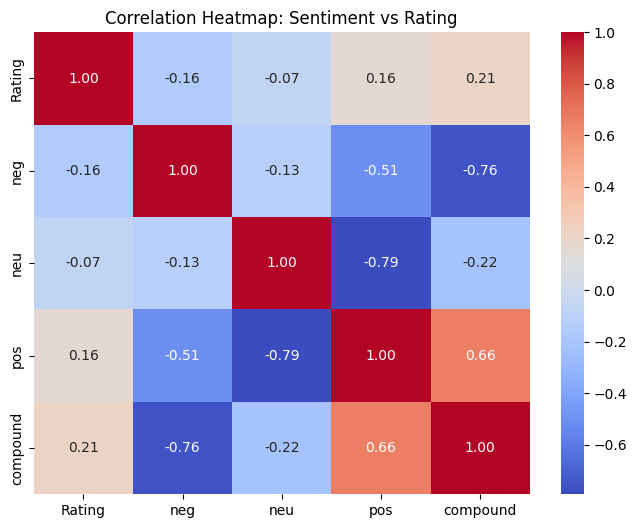

In [56]:
sentiment_rating_corr = df_neg[['Rating', 'neg', 'neu', 'pos', 'compound']].corr()

plt.figure(figsize=(8,6))
sns.heatmap(sentiment_rating_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Sentiment vs Rating')
plt.show()


Topic Analysis Word Cloud for Negative Reviews

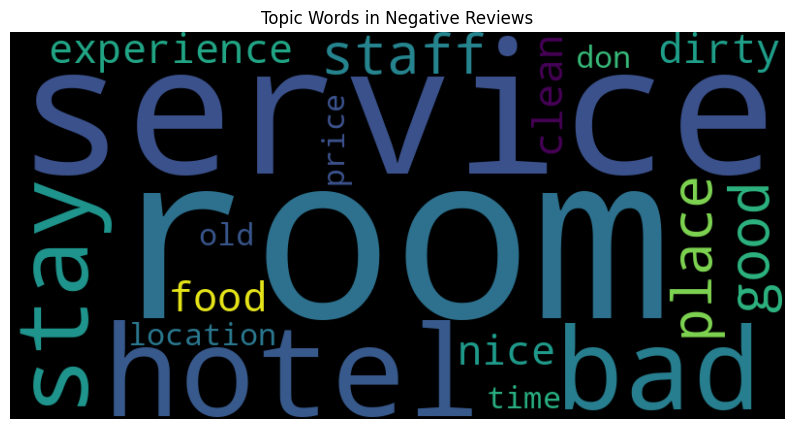

In [57]:
topic_words = []

for topic_idx, topic in enumerate(lda.components_):
    topic_words.extend([words[i] for i in topic.argsort()[-10:]])

topic_words = ' '.join(topic_words)
wordcloud = WordCloud(width=800, height=400).generate(topic_words)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Topic Words in Negative Reviews')
plt.show()


Bar Plot for Place Type vs Average Sentiment Score

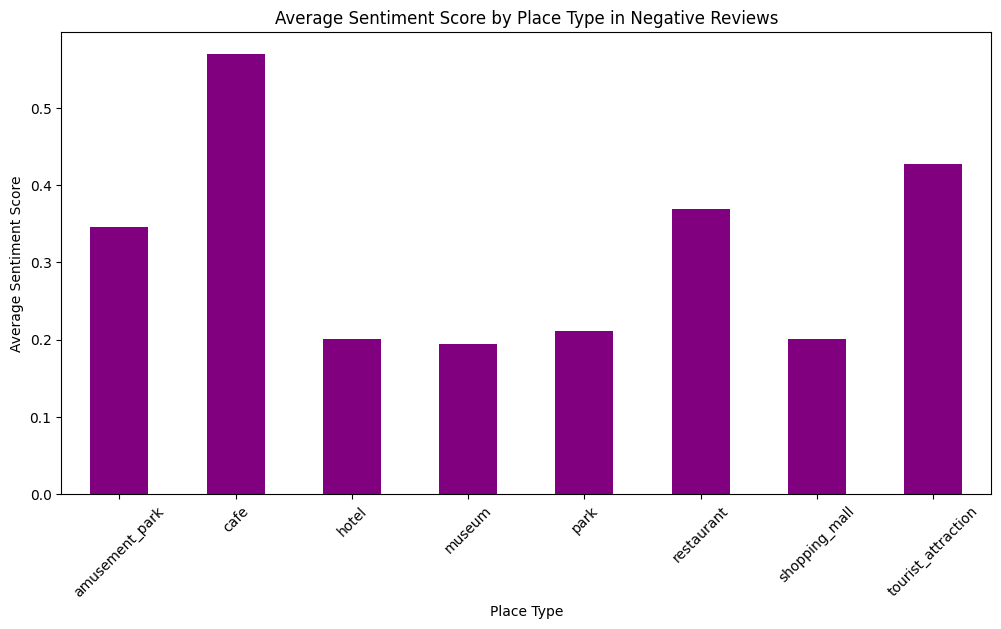

In [58]:
avg_sentiment_by_place = df_neg.groupby('Place Type')['compound'].mean()

plt.figure(figsize=(12,6))
avg_sentiment_by_place.plot(kind='bar', color='purple')
plt.title('Average Sentiment Score by Place Type in Negative Reviews')
plt.xlabel('Place Type')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=45)
plt.show()


In [59]:
positive_reviews = df_pos.groupby('Place Type')['compound'].mean()
negative_reviews = df_neg.groupby('Place Type')['compound'].mean()

print(positive_reviews)
print(negative_reviews)


Place Type
amusement_park        0.601271
cafe                  0.725472
hotel                 0.613951
museum                0.620020
park                  0.646754
restaurant            0.681339
shopping_mall         0.553540
tourist_attraction    0.670361
Name: compound, dtype: float64
Place Type
amusement_park        0.345291
cafe                  0.569900
hotel                 0.201393
museum                0.194087
park                  0.211680
restaurant            0.369620
shopping_mall         0.200684
tourist_attraction    0.427687
Name: compound, dtype: float64


In [60]:
region_reviews = df.groupby('Region')['Rating'].mean()
print(region_reviews)


Region
Central    4.178483
East       4.191389
North      4.155750
South      4.056398
West       4.175142
Name: Rating, dtype: float64


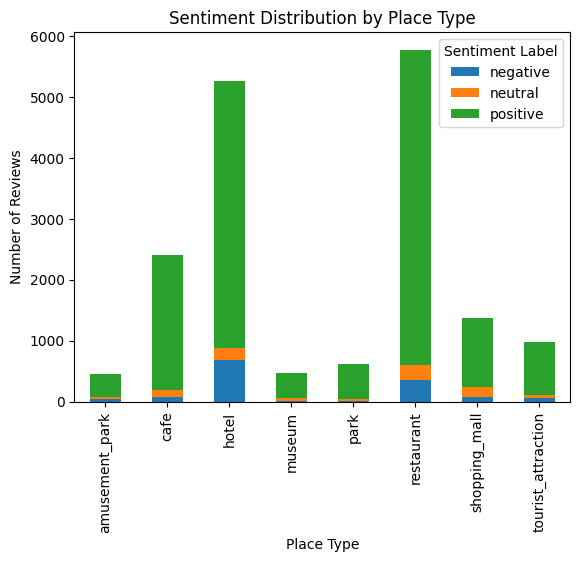

In [61]:
sentiment_by_place_type = df.groupby(['Place Type', 'Sentiment Label']).size().unstack()
sentiment_by_place_type.plot(kind='bar', stacked=True)
plt.title("Sentiment Distribution by Place Type")
plt.ylabel("Number of Reviews")
plt.show()


In [62]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df_neg['Cleaned Review'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

words = vectorizer.get_feature_names_out()
topics = []

for idx, topic in enumerate(lda.components_):
    topics.append([words[i] for i in topic.argsort()[-10:]])

for idx, topic in enumerate(topics):
    print(f"Topic #{idx + 1}: {topic}")

blind_spots = df_neg[df_neg['Cleaned Review'].str.contains('نقص|خدمة غير متوفرة|مرافق غير موجودة', na=False)]
blind_spots[['Place Name', 'Cleaned Review']]

Topic #1: ['staff', 'hotel', 'service', 'place', 'rooms', 'food', 'room', 'nice', 'clean', 'good']
Topic #2: ['disappointing', 'time', 'staff', 'place', 'experience', 'night', 'service', 'room', 'hotel', 'stay']
Topic #3: ['water', 'service', 'staff', 'don', 'reception', 'rooms', 'dirty', 'bad', 'room', 'hotel']
Topic #4: ['kids', 'available', 'just', 'don', 'like', 'staff', 'service', 'place', 'bad', 'good']
Topic #5: ['average', 'food', 'good', 'service', 'god', 'price', 'coffee', 'park', 'excellent', 'place']


Empty DataFrame
Columns: [Place Name, Cleaned Review]
Index: []

# 1. Comparison of Positive vs Negative Reviews per Place Type

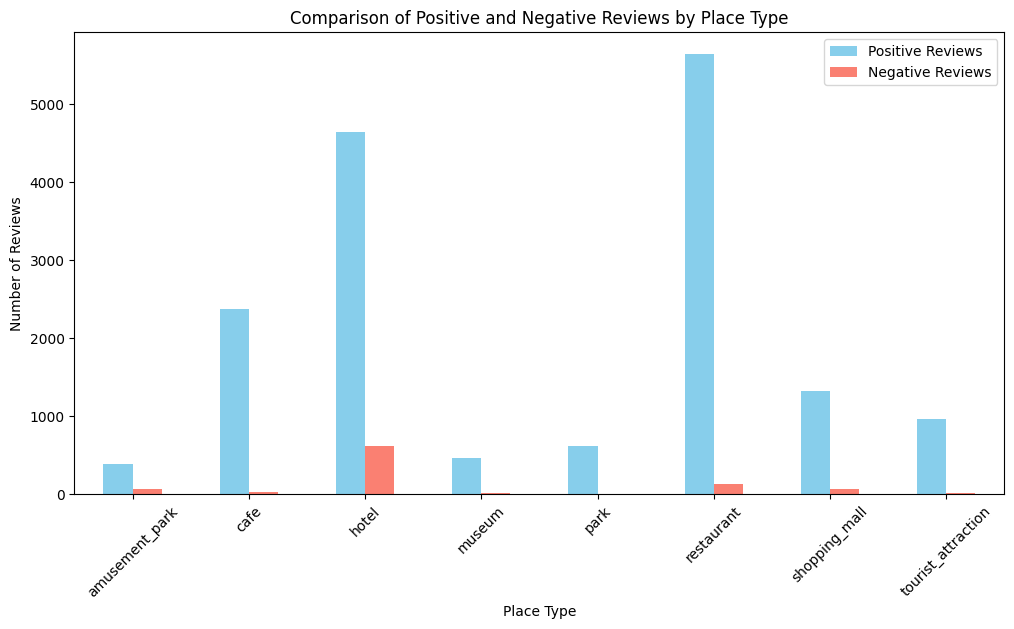

In [63]:
pos_counts = df_pos['Place Type'].value_counts()
neg_counts = df_neg['Place Type'].value_counts()

comparison_df = pd.DataFrame({'Positive Reviews': pos_counts, 'Negative Reviews': neg_counts}).fillna(0)

comparison_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Comparison of Positive and Negative Reviews by Place Type')
plt.xlabel('Place Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


Sentiment Distribution Overall

In [64]:
sentiment_counts = df['Sentiment Label'].value_counts()

plt.figure(figsize=(7, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


/tmp/ipykernel_43003/96784281.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


Percentage of Positive and Negative Reviews

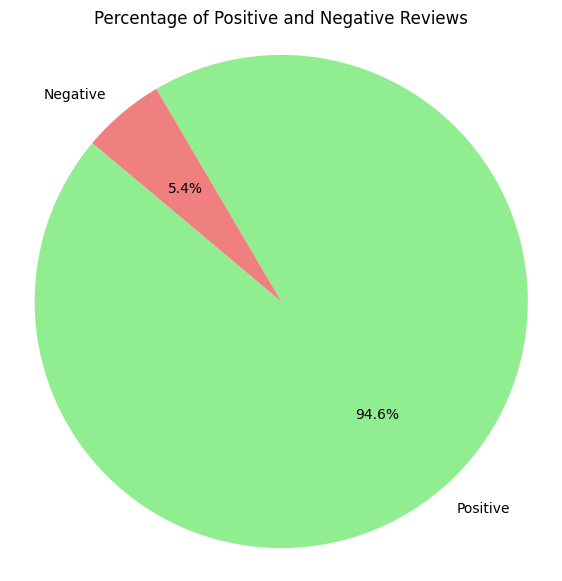

In [65]:
total_reviews = len(df)
positive_percentage = (len(df_pos) / total_reviews) * 100
negative_percentage = (len(df_neg) / total_reviews) * 100

labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Positive and Negative Reviews')
plt.axis('equal')
plt.show()


Most Reviewed Place Categories (Positive and Negative)

/tmp/ipykernel_43003/931258856.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Place Category', data=df_pos, order=df_pos['Place Category'].value_counts().index, palette='cool')
/tmp/ipykernel_43003/931258856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Place Category', data=df_neg, order=df_neg['Place Category'].value_counts().index, palette='magma')


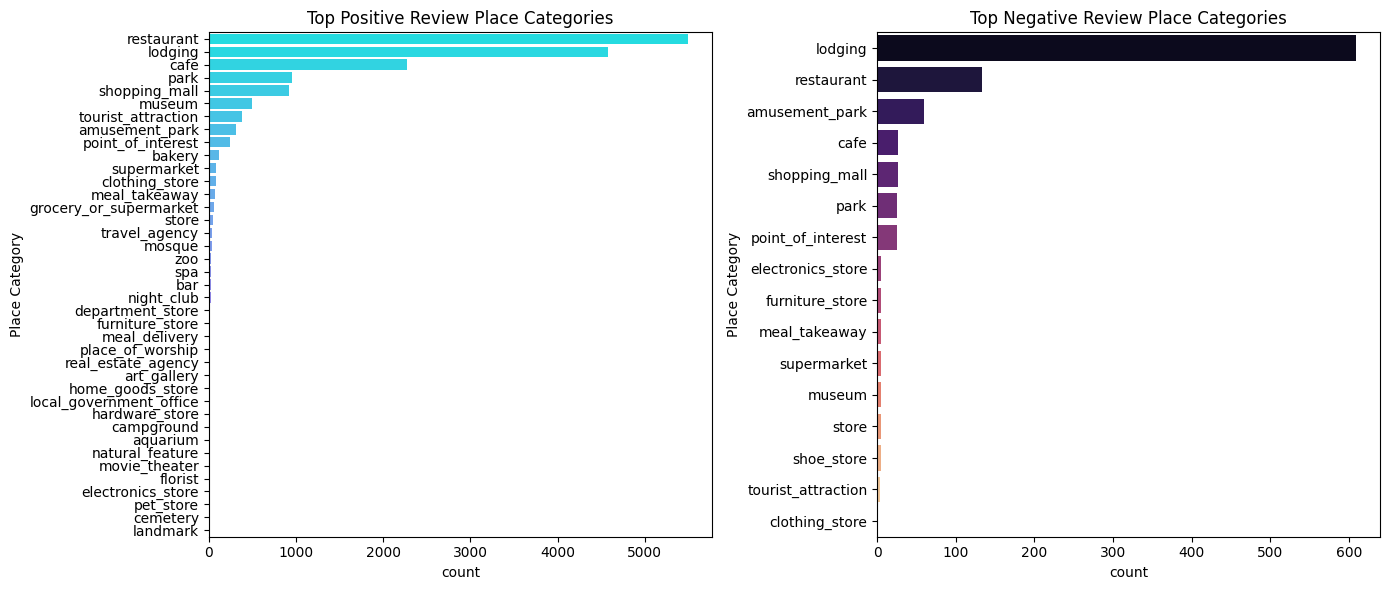

In [66]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(y='Place Category', data=df_pos, order=df_pos['Place Category'].value_counts().index, palette='cool')
plt.title('Top Positive Review Place Categories')

plt.subplot(1, 2, 2)
sns.countplot(y='Place Category', data=df_neg, order=df_neg['Place Category'].value_counts().index, palette='magma')
plt.title('Top Negative Review Place Categories')

plt.tight_layout()
plt.show()


Heatmap of Sentiment Intensity by Place Type

In [67]:
heatmap_data = df.groupby('Place Type')[['pos', 'neg', 'neu']].mean()

plt.figure(figsize=(10, 7))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Sentiment Intensity by Place Type')
plt.show()


Top Cities with Most Negative Reviews

In [68]:
top_neg_cities = df_neg['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_neg_cities.values, y=top_neg_cities.index, palette='Reds_r')
plt.title('Top Cities with Most Negative Reviews')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('City')
plt.show()


/tmp/ipykernel_43003/2119478287.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neg_cities.values, y=top_neg_cities.index, palette='Reds_r')


Top Cities with Most Positive Reviews

/tmp/ipykernel_43003/1466161408.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pos_cities.values, y=top_pos_cities.index, palette='Greens')


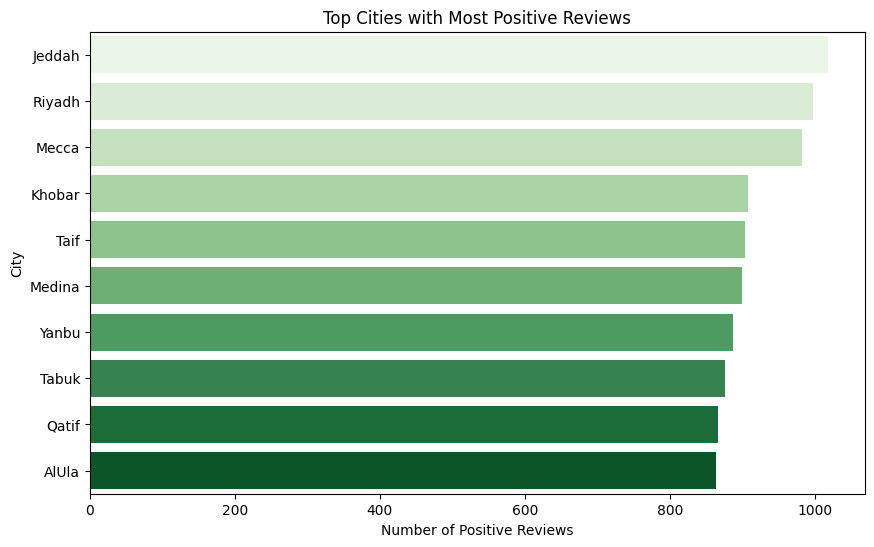

In [69]:
top_pos_cities = df_pos['City'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pos_cities.values, y=top_pos_cities.index, palette='Greens')
plt.title('Top Cities with Most Positive Reviews')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('City')
plt.show()


Boxplot of Ratings by Place Type

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Place Type', y='Rating', data=df, palette='pastel')
plt.title('Distribution of Ratings by Place Type')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_43003/609394009.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Place Type', y='Rating', data=df, palette='pastel')


Sentiment Distribution Across Cities

In [71]:
city_sentiment = df.groupby(['City', 'Sentiment Label']).size().unstack(fill_value=0)
plt.figure(figsize=(16,8))
sns.heatmap(city_sentiment, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap of Sentiment Distribution Across Cities')
plt.xlabel('Sentiment')
plt.ylabel('City')
plt.show()


Clustering Reviews Based on Text Similarity

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['Cleaned Review'].dropna())
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
df['Cluster'] = kmeans.labels_

cluster_counts = df['Cluster'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Clusters of Reviews Based on Text Similarity')
plt.xlabel('Cluster')
plt.ylabel('Number of Reviews')
plt.show()


/tmp/ipykernel_43003/3733376770.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


Emotion Detection Beyond Positive/Negative

In [73]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [74]:
pip install --upgrade transformers torch

Note: you may need to restart the kernel to use updated packages.


Device set to use cpu


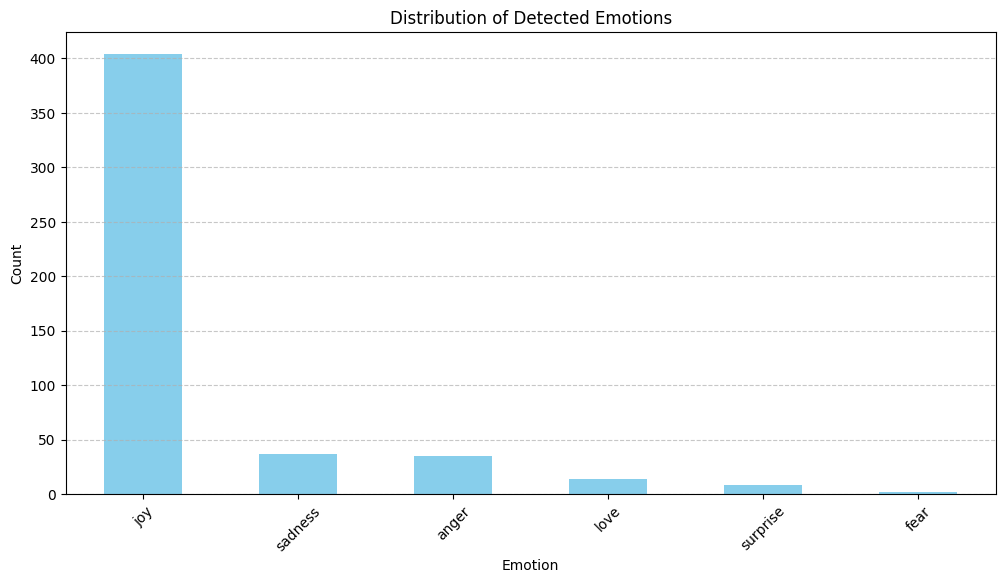

In [75]:
from transformers import pipeline
import matplotlib.pyplot as plt

emotion_classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion')

df_sample = df.sample(500, random_state=42)
df_sample['Detected Emotion'] = df_sample['Cleaned Review'].apply(lambda x: emotion_classifier(x)[0]['label'])

emotion_counts = df_sample['Detected Emotion'].value_counts()

plt.figure(figsize=(12,6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Detected Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Grouped Bar Chart Comparing Sentiments Across Place Types

In [76]:
place_sentiment = df.groupby(['Place Type', 'Sentiment Label']).size().unstack(fill_value=0)
place_sentiment.plot(kind='bar', figsize=(16,8))
plt.title('Sentiment Comparison Across Place Types')
plt.xlabel('Place Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


5. Top 5 Best and Worst Places by Rating
python
نسخ
تحرير

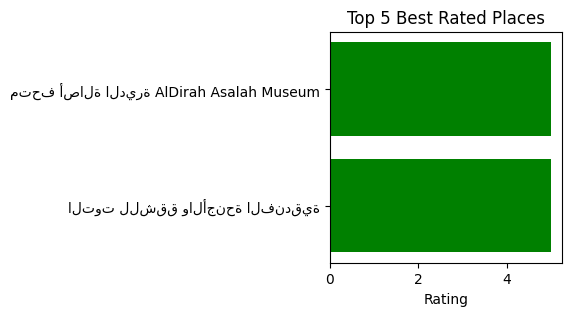

In [77]:
top5_best = df.sort_values(by='Rating', ascending=False).head(5)
top5_worst = df.sort_values(by='Rating', ascending=True).head(5)

plt.figure(figsize=(3,3))
plt.barh(top5_best['Place Name'], top5_best['Rating'], color='green')
plt.title('Top 5 Best Rated Places')
plt.xlabel('Rating')
plt.gca().invert_yaxis()
plt.show()

plt.figure(figsize=(3,3))
plt.barh(top5_worst['Place Name'], top5_worst['Rating'], color='red')
plt.title('Top 5 Worst Rated Places')
plt.xlabel('Rating')
plt.gca().invert_yaxis()
plt.show()


In [78]:
type(review)

str

In [79]:
df.to_csv('LDAmodle1.csv', index=False)